In [20]:
# packages
import os
import numpy as np
import pandas as pd
import scipy.stats as st
import sys
import matplotlib.pyplot as plt

# Simulated data

In [2]:
root_dir = os.getcwd()

data_dir = "/computational_model_data/"

target_string = "output"

runs = []

for subdir, dirs, files in os.walk(root_dir+data_dir):
    for file in files:
        if target_string in file:
            runs.append(file)

In [3]:
simulated_data = pd.DataFrame()

for file_name in runs:
    temp = file_name.split("_")
    code = temp[4]
    level = temp[5]

    temp_data = pd.read_csv(f"{root_dir}/computational_model_data/{file_name}", index_col=False)
    temp_data['convolution_granularity'] = code
    temp_data['level'] = level

    simulated_data = pd.concat([simulated_data, temp_data])

In [4]:
simulated_action_goals = simulated_data[simulated_data.action_goal_selected == True]

In [5]:
# transforming the pixel values to visual degrees accounting for the experimental setup

def pixel_to_degree(distance_on_screen_pixel, mm_per_pixel=595 / 1920, distance_to_screen_mm=840):
    """
    calculate the visual degrees of a distance (saccade amplitude, on screen distance between objects)
    setup:
     - screen_width_in_mm=595
     - screen_height_in_mm=335
     - pixels_screen_width=1920
     - pixels_screen_height=1080
     - distance_to_screen_in_mm=840
    """
    distance_on_screen_mm = float(distance_on_screen_pixel) * mm_per_pixel

    visual_angle_in_radians = np.arctan(distance_on_screen_mm / distance_to_screen_mm)

    return np.rad2deg(visual_angle_in_radians)

In [6]:
# location of spaceship on screen in pixels
spaceship_center_x=954 + 14  # 14 is half the size of spaceship -> center location
spaceship_center_y=270 + 14

# annotate distance to spaceship
simulated_action_goals["distance_to_spaceship_in_pixel"] = np.sqrt(
    np.power((simulated_action_goals.action_goal_x - spaceship_center_x), 2) +
    np.power((simulated_action_goals.action_goal_y - spaceship_center_y), 2))
simulated_action_goals["distance_to_spaceship"] = simulated_action_goals['distance_to_spaceship_in_pixel'].apply(lambda x: pixel_to_degree(x))
simulated_action_goals["distance_to_spaceship_log"] = np.log(simulated_action_goals.distance_to_spaceship)


/var/folders/z1/crk0j_p52yq850yynjpq93wm0000gn/T/ipykernel_8290/2237070438.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  simulated_action_goals["distance_to_spaceship_in_pixel"] = np.sqrt(
/var/folders/z1/crk0j_p52yq850yynjpq93wm0000gn/T/ipykernel_8290/2237070438.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  simulated_action_goals["distance_to_spaceship"] = simulated_action_goals['distance_to_spaceship_in_pixel'].apply(lambda x: pixel_to_degree(x))
/var/folders/z1/crk0j_p52yq850yynjpq93wm0000gn/

## Experimental data

In [7]:
fix_data = pd.read_csv('eye_data/experimental_eye_data_fixations.csv', index_col=False)
distant_fixations = fix_data[fix_data.exploring_fixation == 1]

# only using the ones without drift, because model won't experience drift
DistFix_no_drift = distant_fixations[distant_fixations.N_visible_drift_tiles == 0]
DistFix_no_drift['distance_to_spaceship_log'] = np.log(DistFix_no_drift.distance_to_spaceship)

/var/folders/z1/crk0j_p52yq850yynjpq93wm0000gn/T/ipykernel_8290/2122662444.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DistFix_no_drift['distance_to_spaceship_log'] = np.log(DistFix_no_drift.distance_to_spaceship)


# Plotting

In [8]:
# game features:
scaling=18
edge=34
observation_space_x=40
observation_space_y=60
bottom_edge=15

In [9]:
def NormalizeData(data):
    return (data - np.min(data)) / (np.max(data) - np.min(data))

/var/folders/z1/crk0j_p52yq850yynjpq93wm0000gn/T/ipykernel_8290/1623767186.py:25: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  target_fixations_human = exp_dat[DistFix_no_drift["converging_eye_x_adjusted"].between(x_bounds[0], x_bounds[1])]
/var/folders/z1/crk0j_p52yq850yynjpq93wm0000gn/T/ipykernel_8290/1623767186.py:25: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  target_fixations_human = exp_dat[DistFix_no_drift["converging_eye_x_adjusted"].between(x_bounds[0], x_bounds[1])]
/var/folders/z1/crk0j_p52yq850yynjpq93wm0000gn/T/ipykernel_8290/1623767186.py:25: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  target_fixations_human = exp_dat[DistFix_no_drift["converging_eye_x_adjusted"].between(x_bounds[0], x_bounds[1])]
/var/folders/z1/crk0j_p52yq850yynjpq93wm0000gn/T/ipykernel_8290/1623767186.py:25: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  target_fixations_h

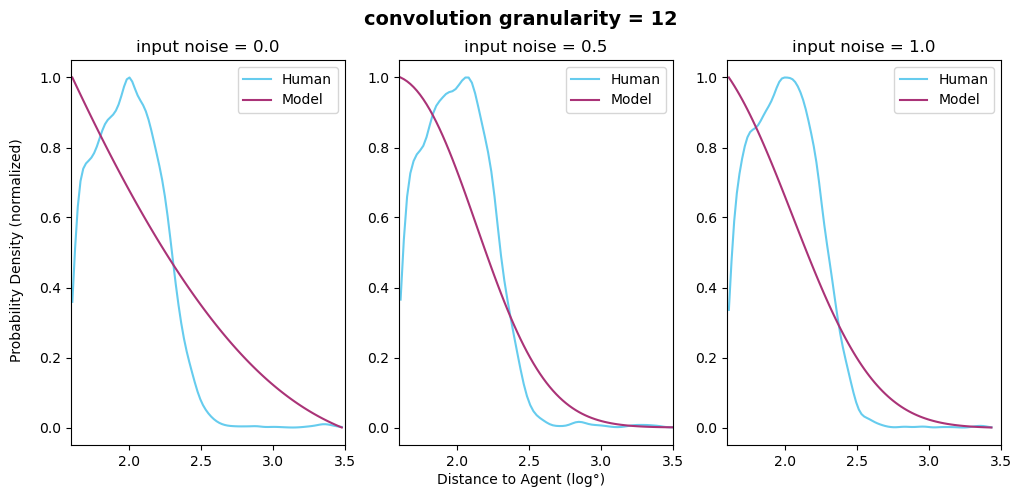

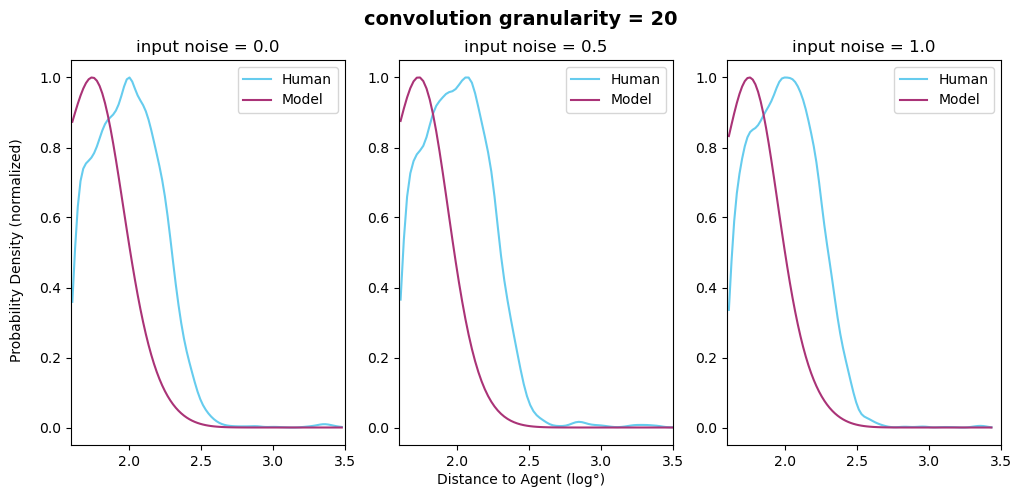

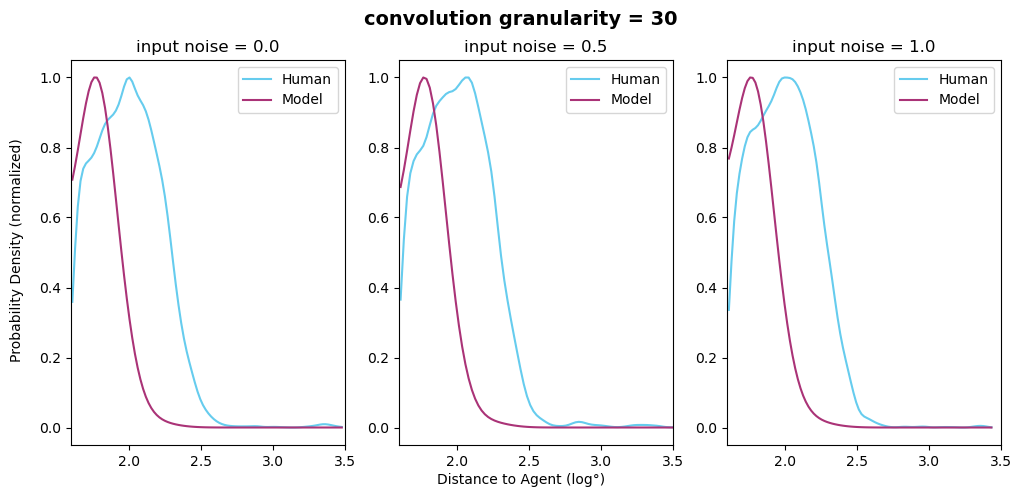

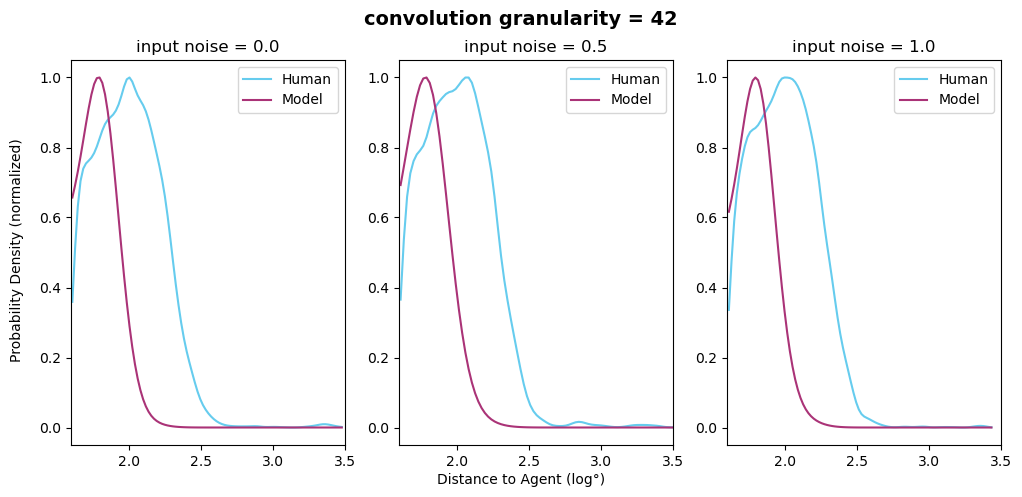

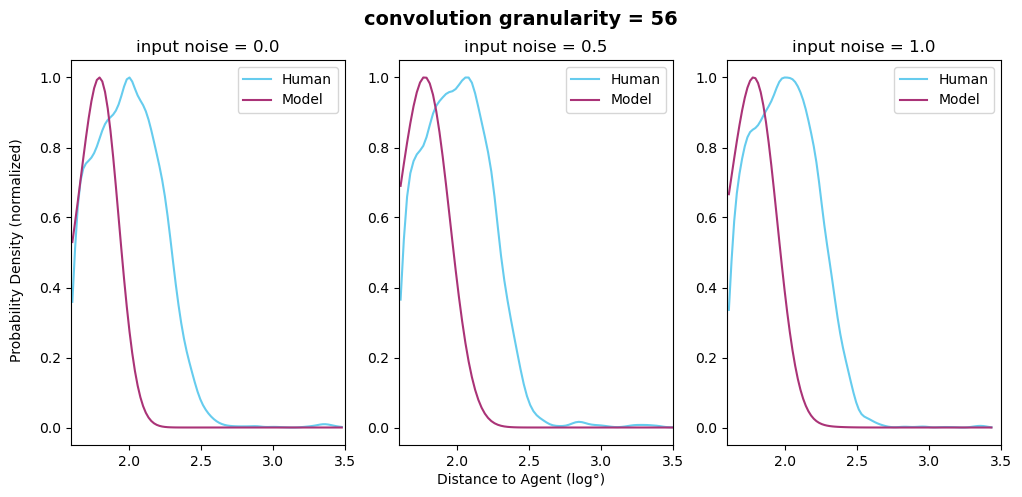

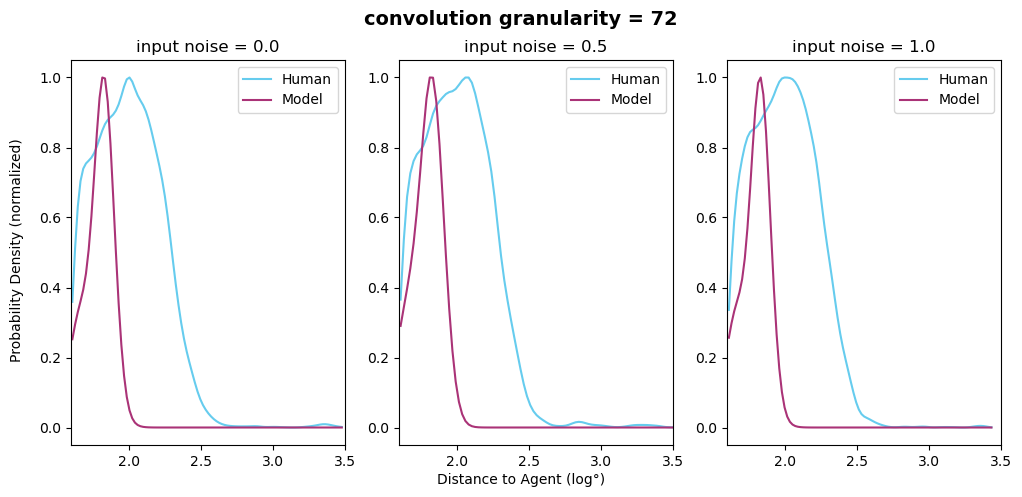

In [10]:
# individual plots
for convolution_granularity in ['12', '20', '30', '42', '56', '72']:
    
    fig, ax = plt.subplots(1, 3, figsize=(12, 5))
    fig.suptitle(f'convolution granularity = {convolution_granularity}', weight="bold", fontsize=14)
    
    # axis labels    
    fig.text(0.5, 0.04, 'Distance to Agent (log°)', ha='center', va='center')
    fig.text(0.08, 0.5, 'Probability Density (normalized)', ha='center', va='center', rotation='vertical')
    
    for input_noise, input_noise_magnitude, subplot_pos in zip(['N', 'W', 'S'], [0.0, 0.5, 1.0], [0, 1, 2]):
        
        exp_dat = DistFix_no_drift[DistFix_no_drift.input_noise == input_noise]
        sim_dat = simulated_action_goals[(simulated_action_goals.convolution_granularity == convolution_granularity) & (simulated_action_goals.input_noise_magnitude == input_noise_magnitude)]

        # initiate plot 
        ax[subplot_pos].set_title(f"input noise = {input_noise_magnitude}", fontsize=12)

        x_bounds = [edge*scaling, (edge+observation_space_x)*scaling]
        y_bounds = [0, (observation_space_y - bottom_edge)*scaling]

        ax[subplot_pos].set_xlim([1.6, 3.5])

        # check for fixation within game boarders
        target_fixations_human = exp_dat[DistFix_no_drift["converging_eye_x_adjusted"].between(x_bounds[0], x_bounds[1])]
        
        # sampling
        kde_human = st.gaussian_kde(np.asarray(target_fixations_human.distance_to_spaceship_log))
        kde_model = st.gaussian_kde(np.asarray(sim_dat.distance_to_spaceship_log))
        
        dist_space = np.linspace(min(target_fixations_human.distance_to_spaceship_log), max(target_fixations_human.distance_to_spaceship_log), 100 )

        prob_dens_human_normalized = NormalizeData(kde_human(dist_space))
        prob_dens_model_normalized = NormalizeData(kde_model(dist_space))
        
        # not normalized
        #ax[subplot_pos].plot( dist_space, kde_human(dist_space), label="Human", color='#66CCEE')
        #ax[subplot_pos].plot( dist_space, kde_model(dist_space), label="Model", color='#AA3377')
          
        # vs. normalized
        ax[subplot_pos].plot( dist_space, prob_dens_human_normalized, label="Human", color='#66CCEE')
        ax[subplot_pos].plot( dist_space, prob_dens_model_normalized, label="Model", color='#AA3377')
        
        # points of highest density
        #point_estimate_human = point_estimate(target_fixations_human.distance_to_spaceship_log)[0]
        #ax[subplot_pos].axvline(point_estimate_human, color='blue')
        
        #point_estimate_model = point_estimate(sim_dat.distance_to_spaceship_log)[0]
        #ax[subplot_pos].axvline(point_estimate_model, color='red')
        
        ax[subplot_pos].legend()


### Big plot

/var/folders/z1/crk0j_p52yq850yynjpq93wm0000gn/T/ipykernel_8290/1578348019.py:38: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  target_fixations_human = exp_dat[DistFix_no_drift["converging_eye_x_adjusted"].between(x_bounds[0], x_bounds[1])]
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
/var/folders/z1/crk0j_p52yq850yynjpq93wm0000gn/T/ipykernel_8290/1578348019.py:38: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  target_fixations_human = exp_dat[DistFix_no_drift["converging_eye_x_adjusted"].between(x_bounds[0], x_bounds[1])]
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
/var/folders/z1/crk0j_p52yq850yynjpq93wm0000gn/T/ipykernel_8290/1578348019.py:38: UserWarning: Boolean Series key will be reindexed to mat

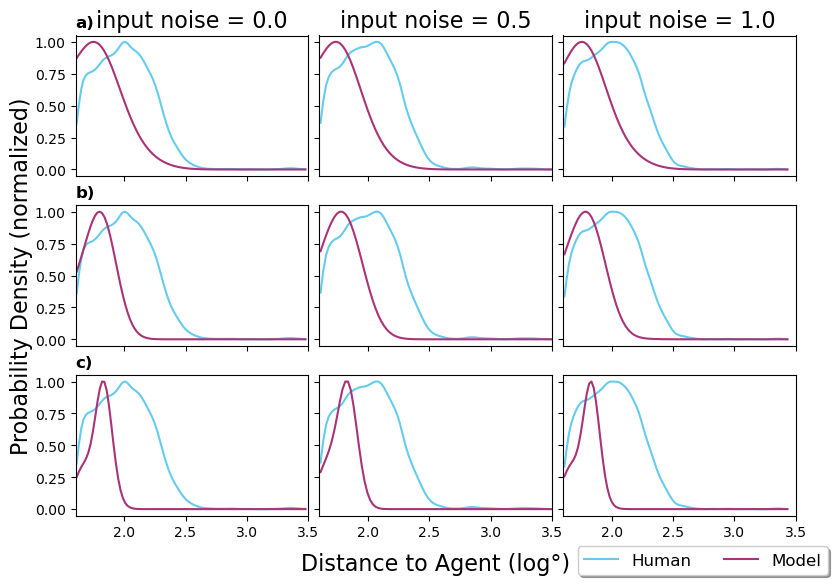

In [11]:

fig, ax = plt.subplots(3, 3, figsize=(9, 6))

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.05, 
                    hspace=0.21)

# axis labels    
fig.text(0.5, 0.02, 'Distance to Agent (log°)', ha='center', va='center', fontsize=16)
fig.text(0.04, 0.5, 'Probability Density (normalized)', ha='center', va='center', rotation='vertical', fontsize=16)

row_titles = ['a)', 'b)', 'c)']

row = 0

for convolution_granularity in ['20', '56', '72']:
    
    ax[row][0].set_title(f'{row_titles[row]}', weight="bold", loc='left', fontsize=12)
    #ax[row][0].set_title(f'{row_titles[row]}', weight="bold", x=-0.05, fontsize=12)  # somehow 'a)' is not displayed...
    
    for input_noise, input_noise_magnitude, subplot_pos in zip(['N', 'W', 'S'], [0.0, 0.5, 1.0], [0, 1, 2]):
        
        exp_dat = DistFix_no_drift[DistFix_no_drift.input_noise == input_noise]
        sim_dat = simulated_action_goals[(simulated_action_goals.convolution_granularity == convolution_granularity) & (simulated_action_goals.input_noise_magnitude == input_noise_magnitude)]

        # initiate plot 
        if row == 0:
            ax[row][subplot_pos].set_title(f"input noise = {input_noise_magnitude}", x=0.5, fontsize=16)

        x_bounds = [edge*scaling, (edge+observation_space_x)*scaling]
        y_bounds = [0, (observation_space_y - bottom_edge)*scaling]

        ax[row][subplot_pos].set_xlim([1.6, 3.5])

        # check for fixation within game boarders
        target_fixations_human = exp_dat[DistFix_no_drift["converging_eye_x_adjusted"].between(x_bounds[0], x_bounds[1])]
        
        # sampling
        kde_human = st.gaussian_kde(np.asarray(target_fixations_human.distance_to_spaceship_log))
        kde_model = st.gaussian_kde(np.asarray(sim_dat.distance_to_spaceship_log))
        
        dist_space = np.linspace(min(target_fixations_human.distance_to_spaceship_log), max(target_fixations_human.distance_to_spaceship_log), 100 )

        prob_dens_human_normalized = NormalizeData(kde_human(dist_space))
        prob_dens_model_normalized = NormalizeData(kde_model(dist_space))
        
        # not normalized
        #ax[subplot_pos].plot( dist_space, kde_human(dist_space), label="Human", color='#66CCEE')
        #ax[subplot_pos].plot( dist_space, kde_model(dist_space), label="Model", color='#AA3377')
          
        # vs. normalized
        ax[row][subplot_pos].plot( dist_space, prob_dens_human_normalized, label="Human", color='#66CCEE')
        ax[row][subplot_pos].plot( dist_space, prob_dens_model_normalized, label="Model", color='#AA3377')
        
        if subplot_pos == 0:
            plt.setp(ax[row][subplot_pos].get_yticklabels(), visible=True)
        else:
            plt.setp(ax[row][subplot_pos].get_yticklabels(), visible=False)
        
        if row == 2:
            plt.setp(ax[row][subplot_pos].get_xticklabels(), visible=True)
        else:
            plt.setp(ax[row][subplot_pos].get_xticklabels(), visible=False)
        
        #ax[1][2].legend()
        #box = ax[1][2].get_position()
        #ax[1][2].set_position([box.x0, box.y0, box.width * 0.8, box.height])
        ax[2][2].legend(loc='upper center', bbox_to_anchor=(0.6, -0.16),
          fancybox=True, shadow=True, ncol=2, fontsize=12)
        
    row += 1


# Log Synthetic Likelihood (by Wood, 2010)

In [18]:
# works for multiple metrics:

def calc_likelihood(s_star, s, single_stat=False, debugme="nope"):
    # calculates a single likelihood from data statistics s
    # and model replicate statistics s_star

    s = np.matrix(s).transpose()
    if debugme == "debug":
        print("s")
        print(s)
    
    # if only a single metric is used to calculate the likelihood, do not apply .transpose()
    if single_stat:
        s_star = np.matrix(s_star)
    else:
        s_star = np.matrix(s_star).transpose()
    if debugme == "debug":
        print("s_star")
        print(s_star)

    mu_hat = np.mean(s_star, axis=1)  # axis = 1 for horizontal mean
    if debugme == "debug":
        print("mu_hat")
        print(mu_hat)

    S = s_star - mu_hat
    if debugme == "debug":
        print("S")
        print(S)

    Sigma_hat = np.dot(S, np.transpose(S)) / (np.shape(S)[1] - 1)
    if debugme == "debug":
        print("Sigma_hat")
        print(Sigma_hat)

    tmp1 = np.transpose(-1 / 2 * (s - mu_hat))
    if debugme == "debug":
        print("tmp1")
        print(tmp1)

    if np.linalg.cond(Sigma_hat) < (1 / sys.float_info.epsilon):
        tmp2 = np.linalg.inv(Sigma_hat)
    else:
        tmp2 = np.linalg.pinv(Sigma_hat)
    tmp2 = np.linalg.inv(Sigma_hat)
    if debugme == "debug":
        print("tmp2")
        print(tmp2)

    tmp3 = (s - mu_hat)
    if debugme == "debug":
        print("tmp3")
        print(tmp3)

    tmp4 = -1 / 2 * np.log(np.linalg.norm(Sigma_hat))
    if debugme == "debug":
        print("tmp4")
        print(tmp4)

    l_s = np.dot(np.dot(tmp1, tmp2), tmp3) + tmp4

    if debugme == "debug":
        print("l_s")
        print(l_s)
        print("\n\n")

    return float(l_s)

### sanity test of components within likelihood function

In [13]:
s = np.asarray(DistFix_no_drift.groupby(['input_noise'])['distance_to_spaceship_log'].mean())

# individual s for every level (6 level for each input noise)
#s = (DistFix_no_drift.groupby(['input_noise', 'level'])['distance_to_spaceship_log'].mean()).to_list()
#s = np.array_split(np.array(s),3)
# levels in s_star will be thrown together because s_star will be cast into mu_hat, the mean vector of the statistics

s

array([2.23096436, 2.24759685, 2.22265954])

In [14]:
y_star = simulated_action_goals[simulated_action_goals.convolution_granularity == '56']
#(y_star.groupby(['level', 'input_noise_magnitude'])['distance_to_spaceship_log'].mean()).to_list()
s_stats = (y_star.groupby(['input_noise_magnitude', 'level'])['distance_to_spaceship_log'].mean()).to_list()
s_star = np.array_split(np.array(s_stats),3)
s_star

[array([1.69985418, 1.71299996, 1.56469425, 1.57029688, 1.28002745,
        1.32143272]),
 array([1.6991463 , 1.66010887, 1.55000639, 1.45638698, 1.2354218 ,
        1.26678458]),
 array([1.54995429, 1.72947682, 1.55123629, 1.62016082, 1.19744736,
        1.61795198])]

In [17]:
calc_likelihood(s_star, s, single_stat=True, debugme='debug')

s
[[2.23096436]
 [2.24759685]
 [2.22265954]]
s_star
[[1.69985418 1.71299996 1.56469425 1.57029688 1.28002745 1.32143272]
 [1.6991463  1.66010887 1.55000639 1.45638698 1.2354218  1.26678458]
 [1.54995429 1.72947682 1.55123629 1.62016082 1.19744736 1.61795198]]
mu_hat
[[1.52488424]
 [1.47797582]
 [1.54437126]]
S
[[ 0.17496994  0.18811572  0.03981001  0.04541264 -0.24485679 -0.20345151]
 [ 0.22117048  0.18213305  0.07203057 -0.02158884 -0.24255402 -0.21119124]
 [ 0.00558303  0.18510556  0.00686503  0.07578956 -0.3469239   0.07358072]]
Sigma_hat
[[0.0341993  0.03544112 0.02189796]
 [0.03544112 0.0382355  0.02048302]
 [0.02189796 0.02048302 0.03317135]]
tmp1
[[-0.35304006 -0.38481051 -0.33914414]]
tmp2
[[1034.79601776 -886.4523587  -135.74056664]
 [-886.4523587   798.45629292   92.14878999]
 [-135.74056664   92.14878999   62.8541128 ]]
tmp3
[[0.70608013]
 [0.76962103]
 [0.67828828]]
tmp4
1.205763799760589
l_s
[[-9.05437638]]





-9.054376379337782

Works wonderfully! The statistics of the 3 different input noise intensities are compressed into a single value that reflects the overall fit between human and model data. Now we can simply calculate the log synthetic likelihood for every possible parameter value:

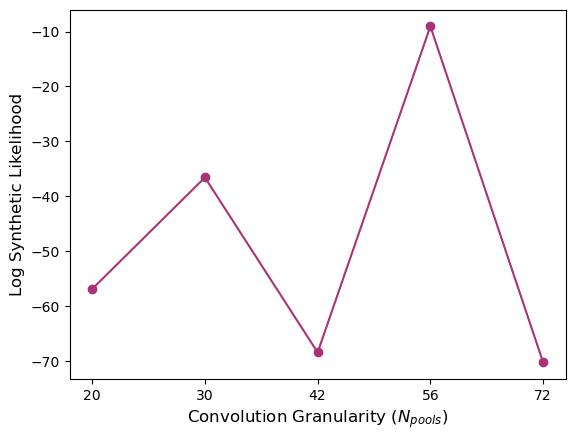

In [19]:
s = np.asarray(DistFix_no_drift.groupby(['input_noise'])['distance_to_spaceship_log'].mean())

loglik_dict = {}

for convolution_granularity in ['20', '30', '42', '56', '72']:  # N_pools = 12 didn't manage to complete harder levels
    
    y_star = simulated_action_goals[simulated_action_goals.convolution_granularity == convolution_granularity]
    s_stats = (y_star.groupby(['input_noise_magnitude', 'level'])['distance_to_spaceship_log'].mean()).to_list()
    s_star = np.array_split(np.array(s_stats),3)

    loglik = calc_likelihood(s_star, s, single_stat=True, debugme='no')
    
    loglik_dict[convolution_granularity] = loglik
    
# plotting
lists = sorted(loglik_dict.items())
convGran, logSynthLik = zip(*lists)
plt.plot(convGran, logSynthLik, marker='o', color='#AA3377', markersize=6)
plt.xlabel('Convolution Granularity ($N_{pools}$)', fontsize=12)
plt.ylabel('Log Synthetic Likelihood', fontsize=12)
plt.show()